# Colab Init

In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'CS6476-CV/2A Linear image processing'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [29]:
import numpy as np
import cv2
import os

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


%matplotlib inline
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
DRIVE_PATH = "/content/drive/My Drive/Projects"
COURSE_PATH = os.path.join(DRIVE_PATH, FOLDERNAME)
DATA_DIR = os.path.join(COURSE_PATH, "data")

# L2 Filtering

## Load an color image in grayscale


In [0]:
img = cv2.imread(DATA_DIR + '/Saturn.jpg', cv2.IMREAD_GRAYSCALE)

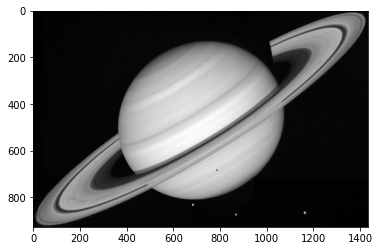

In [33]:
plt.imshow(img, cmap='gray')
plt.show()

## Add noise 

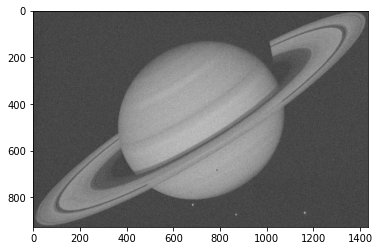

In [46]:
H, W = img.shape 
noise_sigma = 25
noise = np.random.randn(H, W) * 25
noise_img = img + noise
plt.imshow(noise_img, cmap='gray')
plt.show()

## Remove noise with Gaussian Filter

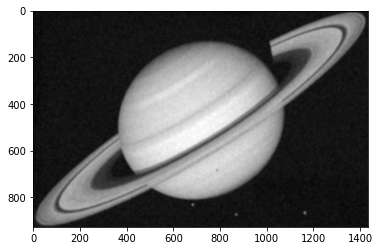

In [57]:
filter_size = 11
filter_sigma = 5
filter = cv2.GaussianBlur(noise_img, (filter_size, filter_size), filter_sigma)
plt.imshow(filter, cmap='gray')
plt.show()

# L3 Linearity and convolution	